In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
make_moons

<function sklearn.datasets._samples_generator.make_moons(n_samples=100, *, shuffle=True, noise=None, random_state=None)>

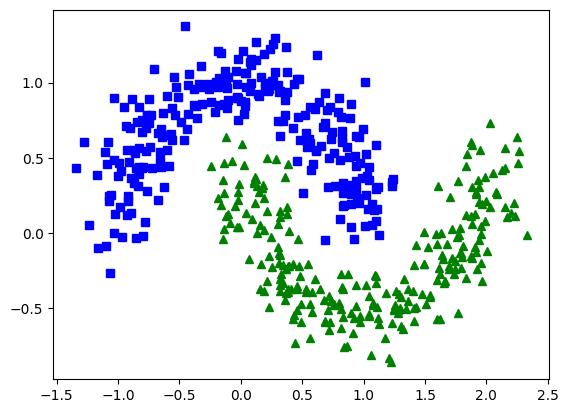

In [7]:
X,y = make_moons(n_samples=500,noise=0.15,random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

plt.plot(X[:, 0][y==0],X[:,1][y==0],"bs")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")

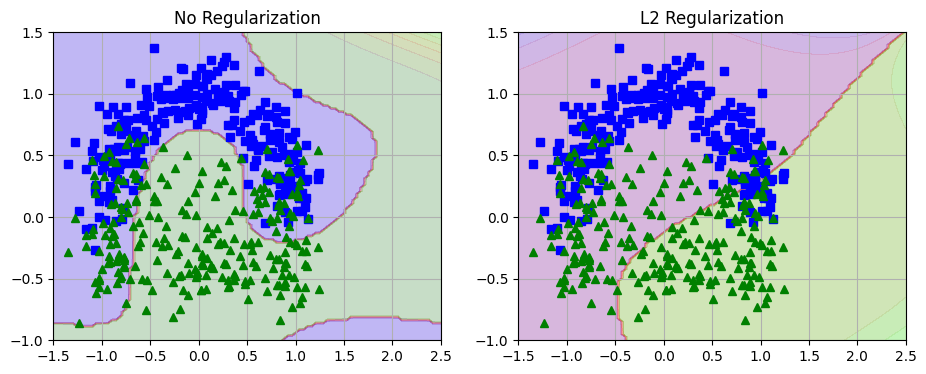

In [11]:
# Create function to plot the dataset
def plot_dataset(X,y,axes):
    plt.plot(X[:,0][y==0],X[:,1][y==0],"bs")
    plt.plot(X[:,0][y==0],X[:,1][y==1],"g^")
    plt.axis(axes)
    plt.grid(True,which='both')

# Create a function to plot the decision boundary
def plot_predictions(clf,axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

# Logistic Regression without regularization
model_no_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("std_scaler", StandardScaler()),
    ("log_reg", LogisticRegression(C=1e10, solver="liblinear", random_state=42))
])

# Logistic Regression with L2 regularization
model_l2 = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("std_scaler", StandardScaler()),
    ("log_reg", LogisticRegression(C=0.001, solver="liblinear", random_state=42))  # C=0.1 implies a stronger regularization
])

model_no_reg.fit(X_train, y_train)
model_l2.fit(X_train, y_train)

# Now, let's plot the decision boundaries
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(model_no_reg, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title("No Regularization")

plt.subplot(122)
plot_predictions(model_l2, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title("L2 Regularization")

plt.show()

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df = df.dropna().select_dtypes(include=['number'])

df.drop(columns=['PassengerId'],inplace=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
1,1,1,38.0,1,0,71.2833
3,1,1,35.0,1,0,53.1000
6,0,1,54.0,0,0,51.8625
10,1,3,4.0,1,1,16.7000
11,1,1,58.0,0,0,26.5500


In [9]:
x = df.drop('Survived', axis =1)
y = df['Survived']

scaler = StandardScaler()
x = scaler.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42,C=0.5)

model.fit(X_train,y_train)

coefficients = model.coef_
print("Model coeficient:", coefficients)

column_names = df.drop('Survived', axis=1).columns

eliminated_features = column_names[coefficients[0] == 0]
print("Eliminated features:", eliminated_features)

Model coeficient: [[-0.10313963 -0.38245202  0.         -0.10773421  0.26175659]]
Eliminated features: Index(['SibSp'], dtype='object')
